In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:\\Users\\User\\Desktop\\Zomato data .csv')

In [7]:
df.shape

(148, 7)

In [37]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [36]:
df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

In [16]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [20]:
df.describe(include=object)

,name,online_order,book_table,rate,listed_in(type)
count,148,148,148,148,148
unique,145,2,2,20,4
top,San Churro Cafe,No,No,3.8/5,Dining
freq,2,90,140,19,110


In [31]:
# Stripped '/5' from rate column

df['rate'] = df['rate'].str.strip('/5')

In [38]:
# Converted rate column from string to float

df['rate'] = df['rate'].astype(float)

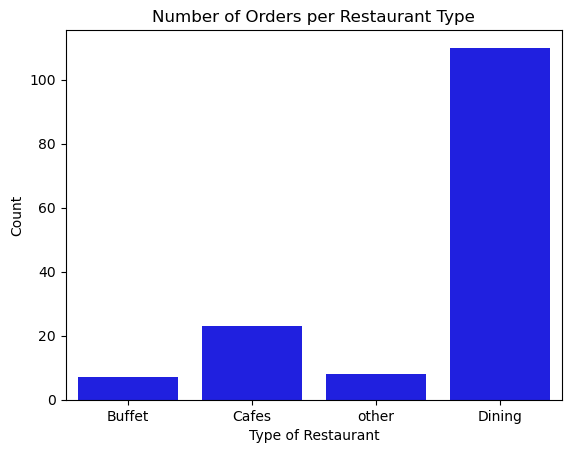

In [105]:
# Number of orders per restaurant type

sns.countplot(data=df, x= 'listed_in(type)', color='Blue')
plt.xlabel('Type of Restaurant')
plt.ylabel('Count')
plt.title('Number of Orders per Restaurant Type')
plt.show()

In [120]:
ax = df.groupby('listed_in(type)', as_index=False)['votes'].sum()

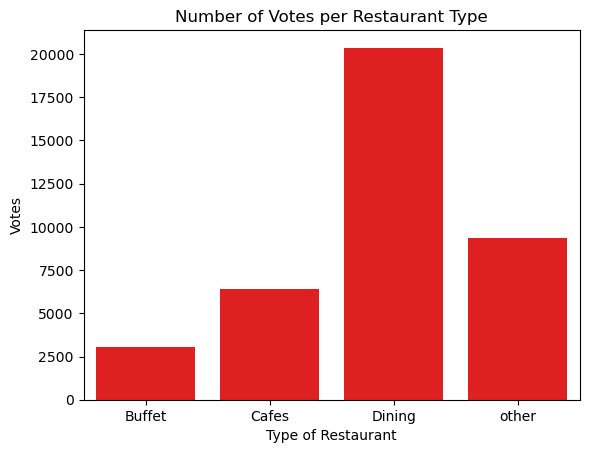

In [106]:
# Number of votes per restaurant type

sns.barplot(data=ax, x= 'listed_in(type)', y='votes', color='Red')
plt.title('Number of Votes per Restaurant Type')
plt.xlabel('Type of Restaurant')
plt.ylabel('Votes')
plt.show()

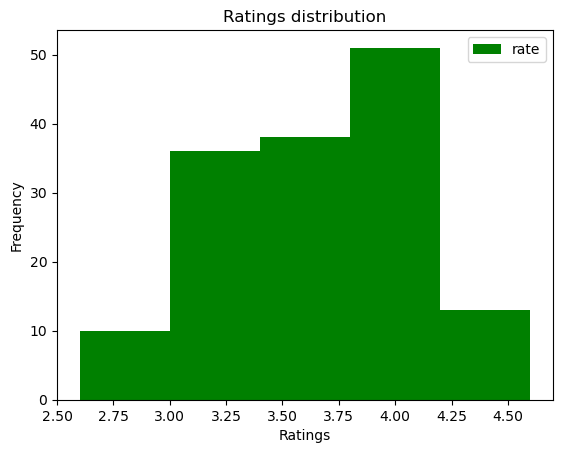

In [152]:
# Ratings distribution

df.plot(kind='hist', bins=5, y='rate', color='green')
plt.title('Ratings distribution')
plt.xlabel('Ratings')
plt.show()

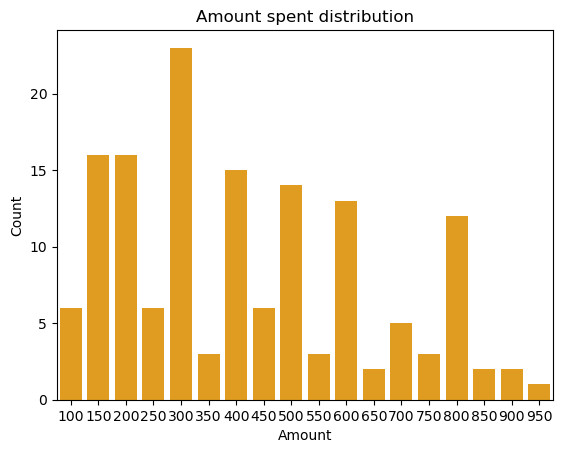

In [168]:
# Amount spent distribution

sns.countplot(data=df, x= 'approx_cost(for two people)', color='orange')
plt.title('Amount spent distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

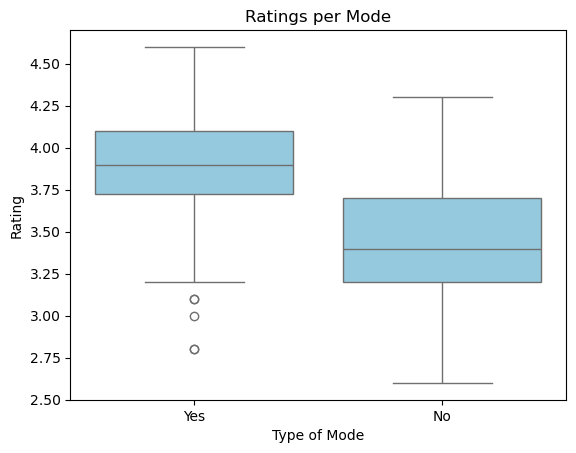

In [187]:
# Ratings per mode

sns.boxplot(data=df, x= 'online_order', y='rate', color='Skyblue')
plt.title('Ratings per Mode')
plt.xlabel('Type of Mode')
plt.ylabel('Rating')
plt.show()

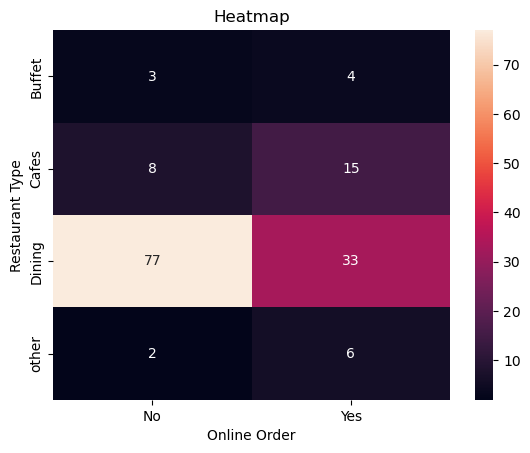

In [209]:
# Type of restaurant vs Mode

pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Restaurant Type')
plt.show()